In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [44]:
yolo = cv2.dnn.readNet("yolov3-tiny.weights", "yolov3-tiny.cfg")

In [45]:
classes = []

with open("./coco.names",'r') as f:
    classes = f.read().splitlines()

In [46]:
len(classes)

80

In [62]:
img=cv2.imread("./image.jpg")

blob = cv2.dnn.blobFromImage(img, 1/255, (320,320), (0,0,0), swapRB=True, crop=False)

In [63]:
blob.shape

(1, 3, 320, 320)

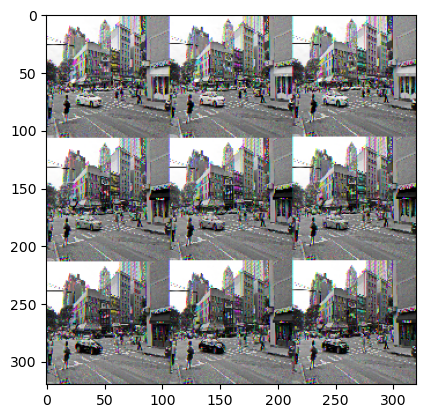

In [64]:
i = blob[0].reshape(320,320,3)
plt.imshow(i)

In [65]:
yolo.setInput(blob)

In [66]:
output_layer_name = yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layer_name)

In [67]:
boxes = []
confidence = []
class_ids = []
height, width, _ = img.shape

for output in layeroutput:
    for detection in output:
        score = detection[5:]
        class_id = np.argmax(score) 
        confindence = score[class_id]
        if confindence > 0.7:
            center_x = int(detection[0]*width)
            center_y = int(detection[1]*height)
            w = int(detection[2]*width)
            h = int(detection[3]*height)
            
            x = int(center_x-w/2)
            y = int(center_y-h/2)
            
            boxes.append([x,y,w,h])
            confidence.append(float(confindence))
            class_ids.append(class_id)

In [68]:
len(boxes)

2

In [69]:
indexes = cv2.dnn.NMSBoxes(boxes,confidence, 0.5,0.4)

In [70]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0.255,size=(len(boxes),3))

In [71]:
for i in indexes.flatten():
    x,y,w,h = boxes[i]
    
    label = str(classes[class_ids[i]])
    confi = str(round(confidence[i],2))
    color = colors[i]
    
    cv2.rectangle(img, (x,y),(x+w,y+h),color,2)
    cv2.putText(img,label+" "+confi,(x,y+20),font,2,(255,255,255),2)

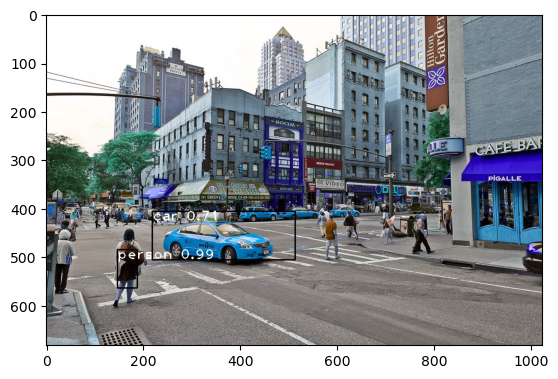

In [72]:
plt.imshow(img)

In [73]:
!curl -O https://st4.depositphotos.com/15113232/41290/i/450/depositphotos_412901662-stock-photo-traffic-new-york-city-yellow.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 57456  100 57456    0     0  62107      0 --:--:-- --:--:-- --:--:-- 62047


In [74]:
cv2.imwrite("./result/res1.jpg",img)

True

In [60]:
!mkdir result